In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data  = pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
data.head(10) # إظهار أول عشرة أسطر

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [4]:
data.tail(10) # إظهار أخر عشر أسطر

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [5]:
data.info() # معلومات عن البيانات

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
data.shape # شكل البيانات

(1000, 12)

In [7]:
data.isnull().sum() # القيم الفقودة في كل عامود

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<AxesSubplot:>

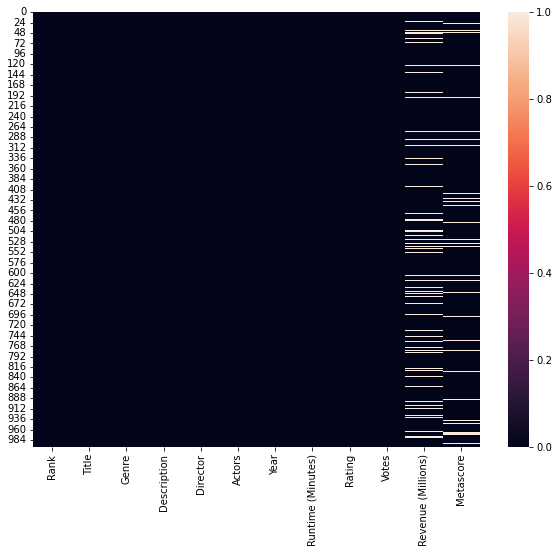

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())

In [9]:
# نسبة القيم الفقودة الى بقية عناصر العامود
per_missing = data.isnull().sum() *100 / len(data)

In [10]:
per_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [11]:
data.dropna()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [12]:
# هل يوجد سطور متكررة 
data.duplicated().any()

False

In [13]:
data = data.drop_duplicates()

In [14]:
# هنا تم تغير شكل القيم العشرية 
pd.options.display.float_format = '{:.2f}'.format
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.00,1000.00,1000.00,1000.00,1000.00,872.00,936.00
mean,500.50,2012.78,113.17,6.72,169808.26,82.96,58.99
std,288.82,3.21,18.81,0.95,188762.65,103.25,17.19
min,1.00,2006.00,66.00,1.90,61.00,0.00,11.00
25%,250.75,2010.00,100.00,6.20,36309.00,13.27,47.00
50%,500.50,2014.00,111.00,6.80,110799.00,47.98,59.50
75%,750.25,2016.00,123.00,7.40,239909.75,113.72,72.00
max,1000.00,2016.00,191.00,9.00,1791916.00,936.63,100.00


In [15]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [16]:
# أسماء الافلام التى مدتها أكثر من ساعتين
data[data['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [17]:
#  متوسط التصويت في كل سنة
data.groupby('Year')['Votes'].mean().sort_values(ascending =False)

Year
2012   285226.09
2008   275505.38
2006   269289.95
2009   255780.65
2010   252782.32
2007   244331.04
2011   240790.30
2013   219049.65
2014   203930.22
2015   115726.22
2016    48591.75
Name: Votes, dtype: float64

In [18]:
# متوسط الإيرادات في كل سنة 
data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending =False)

Year
2009   112.60
2012   107.97
2010   105.08
2008    99.08
2007    87.88
2011    87.61
2013    87.12
2006    86.30
2014    85.08
2015    78.36
2016    54.69
Name: Revenue (Millions), dtype: float64

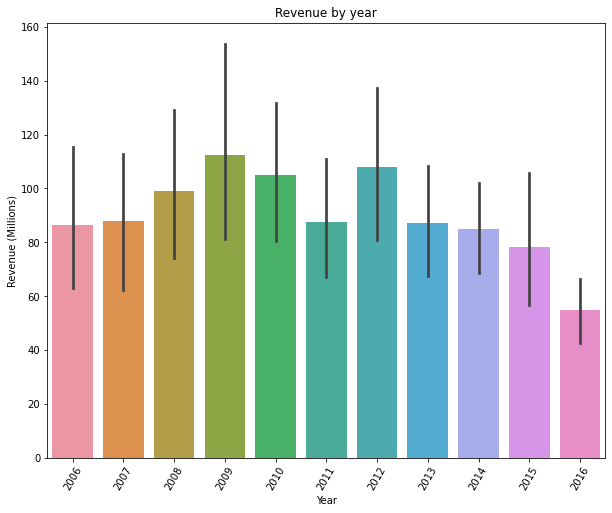

In [19]:
# بعد sns ألم تدرس 
plt.figure(figsize=(10,8))
sns.barplot(x='Year',y='Revenue (Millions)',data=data)
plt.title('Revenue by year')
plt.xticks(rotation = 60)
plt.show()

In [20]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [21]:
# متوسط تقييم كل كاتب
data.groupby('Director')['Rating'].mean().sort_values(ascending =False)

Director
Nitesh Tiwari       8.80
Christopher Nolan   8.68
Olivier Nakache     8.60
Makoto Shinkai      8.60
Aamir Khan          8.50
                    ... 
Micheal Bafaro      3.50
Jonathan Holbrook   3.20
Shawn Burkett       2.70
James Wong          2.70
Jason Friedberg     1.90
Name: Rating, Length: 644, dtype: float64

In [22]:
# أطول عشر أفلام
data.nlargest(10,'Runtime (Minutes)')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.60,160350,25.03,NaN
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.80,341170,54.12,68.00
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.20,865134,116.87,75.00
311,312,La vie d'Adèle,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.80,103150,2.20,88.00
965,966,Inland Empire,"Drama,Mystery,Thriller",As an actress starts to adopt the persona of h...,David Lynch,"Laura Dern, Jeremy Irons, Justin Theroux, Karo...",2006,180,7.00,44227,NaN,NaN
267,268,Cloud Atlas,"Drama,Sci-Fi",An exploration of how the actions of individua...,Tom Tykwer,"Tom Hanks, Halle Berry, Hugh Grant, Hugo Weaving",2012,172,7.50,298651,27.10,55.00
430,431,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.40,238789,6.52,67.00
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.60,1047747,187.99,74.00
75,76,Pirates of the Caribbean: At World's End,"Action,Adventure,Fantasy","Captain Barbossa, Will Turner and Elizabeth Sw...",Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley,Ge...",2007,169,7.10,498821,309.40,50.00
271,272,The Hobbit: An Unexpected Journey,"Adventure,Fantasy","A reluctant hobbit, Bilbo Baggins, sets out to...",Peter Jackson,"Martin Freeman, Ian McKellen, Richard Armitage...",2012,169,7.90,668651,303.00,58.00


In [23]:
# أقصر عشر أفلام 
data.nsmallest(10,'Runtime (Minutes)')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
793,794,Ma vie de Courgette,"Animation,Comedy,Drama","After losing his mother, a young boy is sent t...",Claude Barras,"Gaspard Schlatter, Sixtine Murat, Paulin Jacco...",2016,66,7.80,4370,0.29,85.00
42,43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.70,496,NaN,NaN
819,820,Wolves at the Door,"Horror,Thriller",Four friends gather at an elegant home during ...,John R. Leonetti,"Katie Cassidy, Elizabeth Henstridge, Adam Camp...",2016,73,4.60,564,NaN,63.00
711,712,La tortue rouge,"Animation,Fantasy",A man is shipwrecked on a deserted island and ...,Michael Dudok de Wit,"Emmanuel Garijo, Tom Hudson, Baptiste Goy, Axe...",2016,80,7.60,11482,0.92,86.00
949,950,Kicks,Adventure,Brandon is a 15 year old whose dream is a pair...,Justin Tipping,"Jahking Guillory, Christopher Jordan Wallace,C...",2016,80,6.10,2417,0.15,69.00
258,259,Lights Out,Horror,Rebecca must unlock the terror behind her litt...,David F. Sandberg,"Teresa Palmer, Gabriel Bateman, Maria Bello,Bi...",2016,81,6.40,69823,67.24,58.00
317,318,The Stakelander,"Action,Horror",When his home of New Eden is destroyed by a re...,Dan Berk,"Connor Paolo, Nick Damici, Laura Abramsen, A.C...",2016,81,5.30,1263,NaN,NaN
382,383,Hush,"Horror,Thriller",A deaf writer who retreated into the woods to ...,Mike Flanagan,"John Gallagher Jr., Kate Siegel, Michael Trucc...",2016,81,6.60,45867,NaN,67.00
444,445,The Thinning,Thriller,"""The Thinning"" takes place in a post-apocalypt...",Michael J. Gallagher,"Logan Paul, Peyton List, Lia Marie Johnson,Cal...",2016,81,6.00,4531,NaN,31.00
862,863,"Alexander and the Terrible, Horrible, No Good,...","Comedy,Family",Alexander's day begins with gum stuck in his h...,Miguel Arteta,"Steve Carell, Jennifer Garner, Ed Oxenbould, D...",2014,81,6.20,32310,66.95,54.00


In [24]:
top10_len = data.nlargest(10,'Runtime (Minutes)')[['Runtime (Minutes)','Title']]\
.set_index('Title')

In [25]:
top10_len

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


In [26]:
down10_len = data.nsmallest(10,'Runtime (Minutes)')[['Runtime (Minutes)','Title']].\
 set_index('Title')

In [27]:
down10_len

,Runtime (Minutes)
Title,
Ma vie de Courgette,66
Don't Fuck in the Woods,73
Wolves at the Door,73
La tortue rouge,80
Kicks,80
Lights Out,81
The Stakelander,81
Hush,81
The Thinning,81


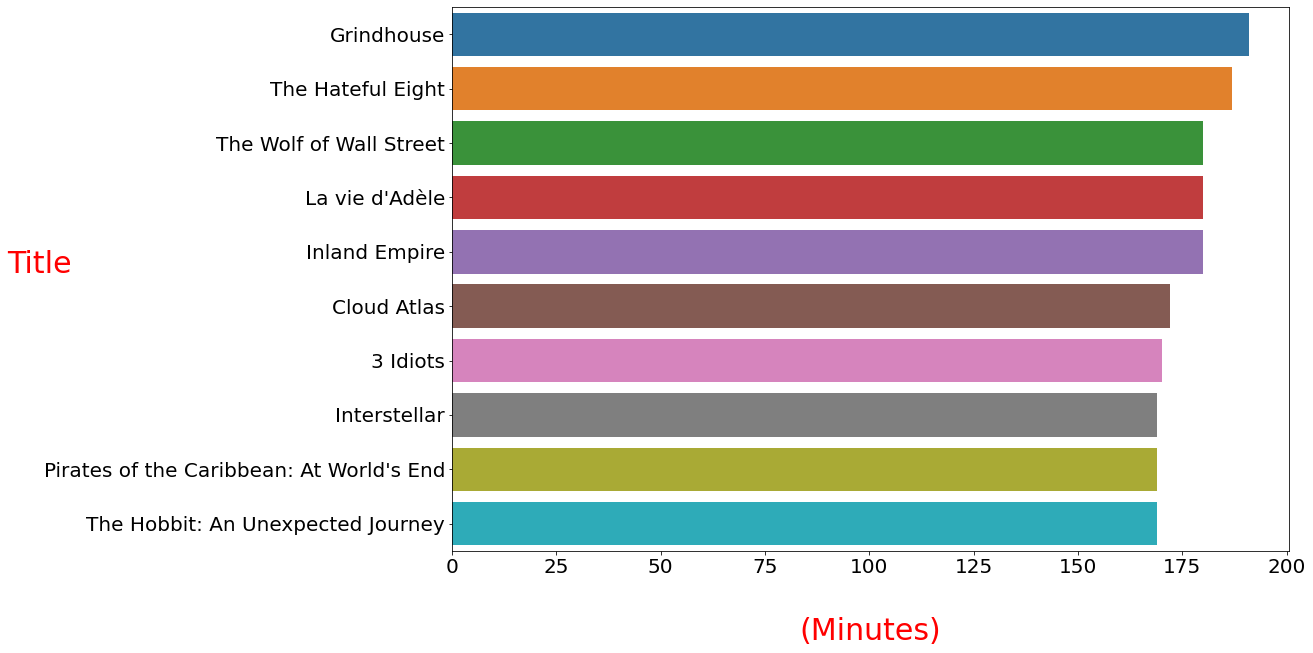

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='Runtime (Minutes)',y=top10_len.index,data=top10_len)
plt.xlabel('(Minutes)',fontdict={'fontsize':30,'color':'r'},labelpad=40)
plt.xticks(fontsize=20)
plt.ylabel('Title',fontdict={'fontsize':30,'color':'r'},rotation =0)
plt.yticks(fontsize=20)
plt.show()

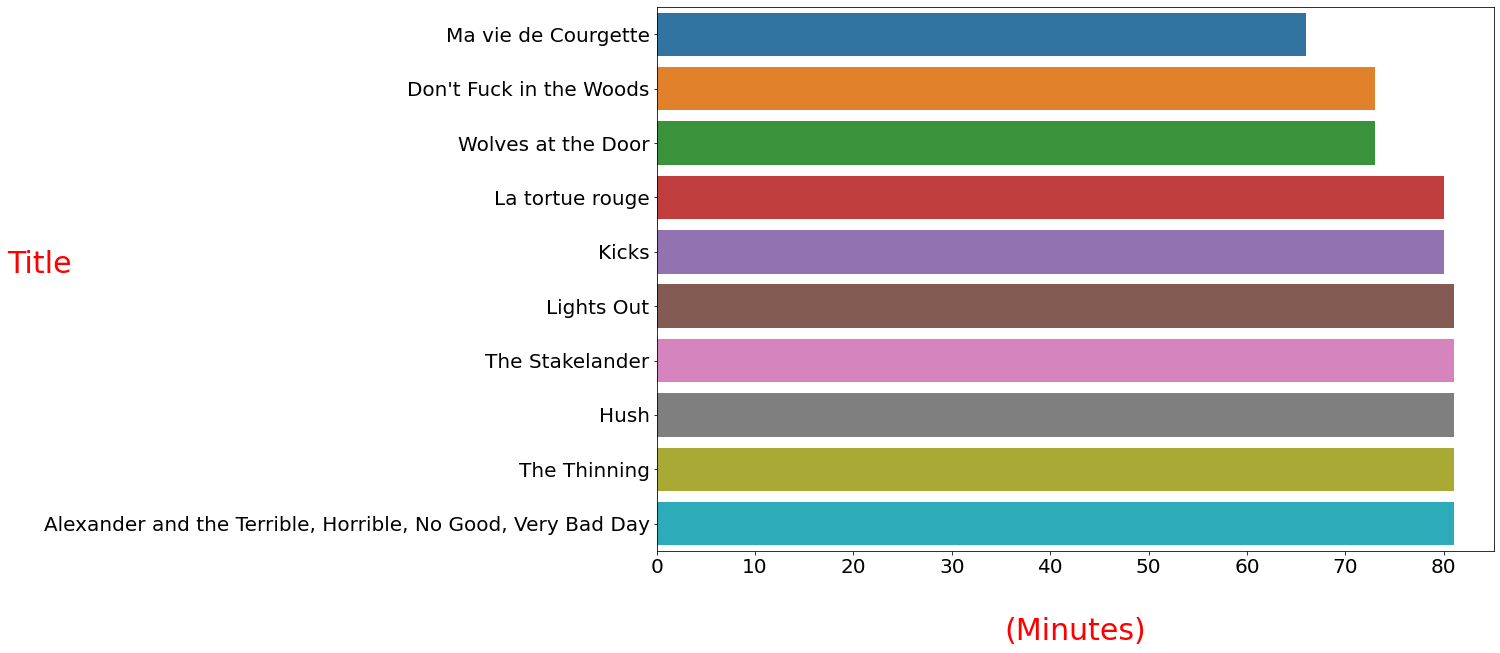

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(data=down10_len,x='Runtime (Minutes)',y=down10_len.index)
plt.xlabel('(Minutes)',fontdict={'fontsize':30,'color':'r'},labelpad=40)
plt.xticks(fontsize=20)
plt.ylabel('Title',fontdict={'fontsize':30,'color':'r'},rotation =0)
plt.yticks(fontsize=20)
plt.show()

In [30]:
# عدد الأفلام في كل سنة
data['Year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

Text(0.5, 1.0, 'number of movies per year')

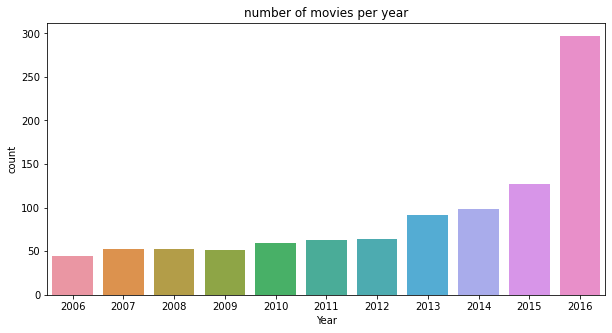

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Year',data=data)
plt.title('number of movies per year')

In [32]:
# معرفة الفلم عن طريق قيمة محدد تدل عليه
data[data['Revenue (Millions)'] == 936.63]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [33]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [34]:
# أفضل عشر أفلام تقييم مع أسم الكاتب  
top10_rating = data.nlargest(10,'Rating')[['Director','Title','Rating']]\
.set_index('Title')

In [35]:
top10_rating

,Director,Rating
Title,,
The Dark Knight,Christopher Nolan,9.00
Inception,Christopher Nolan,8.80
Dangal,Nitesh Tiwari,8.80
Interstellar,Christopher Nolan,8.60
Kimi no na wa,Makoto Shinkai,8.60
The Intouchables,Olivier Nakache,8.60
The Prestige,Christopher Nolan,8.50
The Departed,Martin Scorsese,8.50
The Dark Knight Rises,Christopher Nolan,8.50


In [36]:
# أقل عشر أفلام تقييم 
down10_rating = data.nsmallest(10,'Rating')[['Director','Title','Rating']]\
.set_index('Title')
down10_rating

,Director,Rating
Title,,
Disaster Movie,Jason Friedberg,1.90
Don't Fuck in the Woods,Shawn Burkett,2.70
Dragonball Evolution,James Wong,2.70
Tall Men,Jonathan Holbrook,3.20
The Intent,Femi Oyeniran,3.50
Wrecker,Micheal Bafaro,3.50
The Last Face,Sean Penn,3.70
Satanic,Jeffrey G. Hunt,3.70
The Disappointments Room,D.J. Caruso,3.90


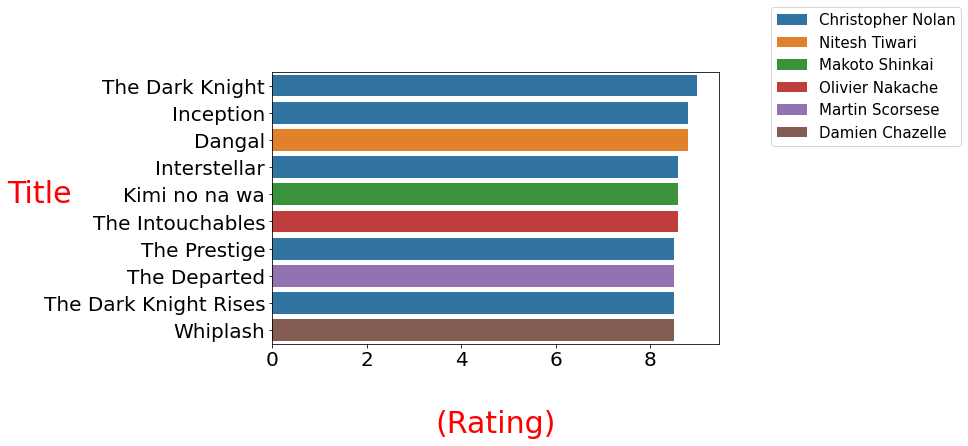

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='Rating',y=top10_rating.index,data=top10_rating,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.1,0.7),fontsize=15,markerscale=5)
plt.xlabel('(Rating)',fontdict={'fontsize':30,'color':'r'},labelpad=40)
plt.xticks(fontsize=20)
plt.ylabel('Title',fontdict={'fontsize':30,'color':'r'},rotation =0)
plt.yticks(fontsize=20)
plt.show()

In [38]:
# أقل عشر أفلام إيرادات 
down_10 = data.nsmallest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].set_index('Title')
down_10

,Revenue (Millions)
Title,
A Kind of Murder,0.00
Dead Awake,0.01
Wakefield,0.01
Lovesong,0.01
"Love, Rosie",0.01
Into the Forest,0.01
Stake Land,0.02
The First Time,0.02
The Blackcoat's Daughter,0.02


In [39]:
# أكثر عشر أفلام إيرادات
top_10 = data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].set_index('Title')
top_10

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


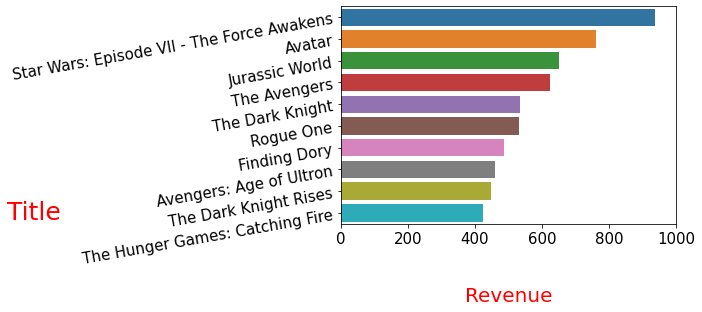

In [40]:
sns.barplot(x='Revenue (Millions)',y=top_10.index,data=top_10)
plt.show
plt.xlabel('Revenue',fontdict={'fontsize':20,'color':'r'},labelpad=40)
plt.xticks(fontsize=15)
plt.ylabel('Title',fontdict={'fontsize':25,'color':'r'},rotation =0,loc='bottom')
plt.yticks(fontsize=15,rotation = 10)
plt.xlim(0,1000)
plt.show()

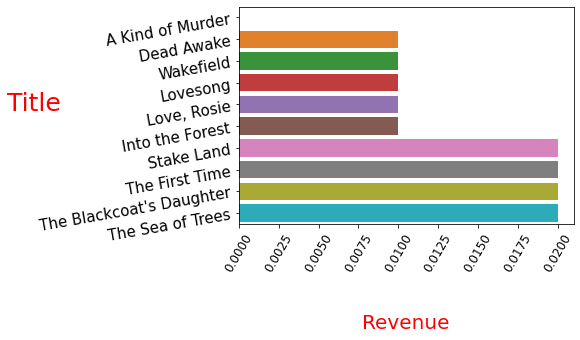

In [41]:
sns.barplot(x='Revenue (Millions)',y=down_10.index,data=down_10)
plt.show
plt.xlabel('Revenue',fontdict={'fontsize':20,'color':'r'},labelpad=40)
plt.xticks(fontsize=12,rotation=60)
plt.ylabel('Title',fontdict={'fontsize':25,'color':'r'},rotation =0)
plt.yticks(fontsize=15,rotation = 10)
plt.show()

In [42]:
data.groupby('Year')['Rating'].mean()

Year
2006   7.12
2007   7.13
2008   6.78
2009   6.96
2010   6.83
2011   6.84
2012   6.92
2013   6.81
2014   6.84
2015   6.60
2016   6.44
Name: Rating, dtype: float64

In [43]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

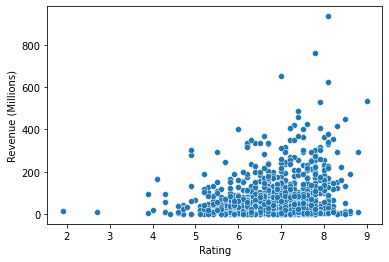

In [44]:
sns.scatterplot(data=data,x='Rating',y='Revenue (Millions)')

In [45]:
# دالة ترجع فئة للتقيم
def rating(rating):
    if rating >=7.0:
        return 'Excellent'
    elif rating >=5.0:
        return 'Good'
    elif rating >=3:
        return 'Normal'
    else :
        return 'Bad'

In [46]:
# إضافة عامود موقعه أخر عامود
data['rating_cat'] = data['Rating'].apply(rating)

In [47]:
# إسقاط العامود الذي أضفناها
data = data.drop(axis=1,columns='rating_cat')

In [48]:
# إضافة العامود في المكان المناسب
data.insert(loc=8,column = 'Rating_cata',value=data['Rating'].apply(rating))

In [49]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating_cata,Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,Excellent,8.10,757074,333.13,76.00
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,Excellent,7.00,485820,126.46,65.00
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,Excellent,7.30,157606,138.12,62.00
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,Excellent,7.20,60545,270.32,59.00
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,Good,6.20,393727,325.02,40.00


In [50]:
df = data['Rating_cata'].value_counts()
df

Good         512
Excellent    445
Normal        40
Bad            3
Name: Rating_cata, dtype: int64

<AxesSubplot:>

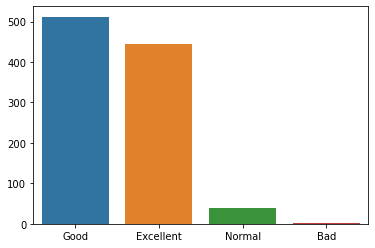

In [51]:
sns.barplot(x=df.index,y=df.values)

In [52]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating_cata', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore'],
      dtype='object')

In [53]:
# Action عدد الأفلام التى تحوى نوع 
data['Genre'].str.contains('Action',case=False).sum()

303

In [54]:
data['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [55]:
# فصل عناصر العامود
list1 = []
for value in data['Genre']:
    list1.append(value.split(','))

In [56]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [57]:
# لفصل العناصر DataFrame تحويل القائمة السابقة الى 
df_l = pd.DataFrame(list1)
df_2 = df_l[0].value_counts()
df_3 = df_l[1].value_counts()
df_4 = df_l[2].value_counts()
df_2

Action       293
Drama        195
Comedy       175
Adventure     75
Crime         71
Biography     64
Animation     49
Horror        46
Mystery       13
Thriller      10
Fantasy        4
Sci-Fi         3
Romance        2
Name: 0, dtype: int64

<AxesSubplot:>

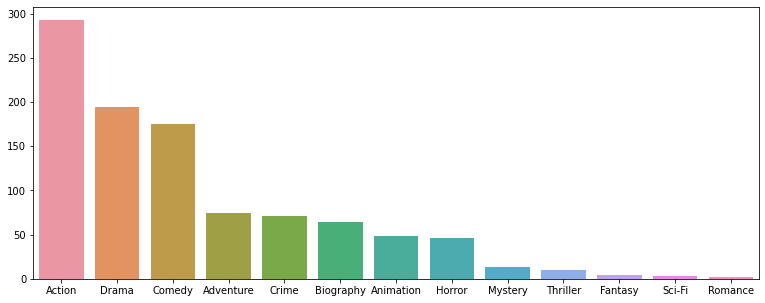

In [58]:
# تم أخذ العامود الأول لأنه النوع الفعلي للفلم 
plt.figure(figsize=(13,5))
sns.barplot(x=df_2.index , y=df_2.values)

In [59]:
# فصل بطريقة أخرى
one_type = []
for items in list1:
    for item in items:
        one_type.append(item)
one_type 

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [60]:
# تحويل القائمة الى سلسة لسهولة التعامل
data1 = pd.Series(one_type)
data1

0          Action
1       Adventure
2          Sci-Fi
3       Adventure
4         Mystery
          ...    
2550    Adventure
2551       Comedy
2552       Comedy
2553       Family
2554      Fantasy
Length: 2555, dtype: object

In [61]:
# كل الأنواع
data1.unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller',
       'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music',
       'Biography', 'Romance', 'History', 'Crime', 'Western', 'War',
       'Musical', 'Sport'], dtype=object)

In [62]:
# عدد كل الأنواع 
data1.nunique()

20